In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Getting number of mice
unique_mice = merge_df['Mouse ID'].unique()
print(unique_mice)
len(unique_mice)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

249

In [3]:
duplicated = merge_df.duplicated()
print(duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.loc[merge_df.duplicated(), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
new_df = merge_df.drop_duplicates()
len(new_df)

1892

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = merge_df.duplicated()
print(duplicated)

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = merge_df.drop_duplicates()

In [9]:
# Checking the number of mice in the clean DataFrame.
len(new_df)

1892

In [10]:
#Prepare the Dataframes
regimen = merge_df['Drug Regimen'].unique()

Summary statistics

In [12]:
Rami_df = new_df[new_df['Drug Regimen'].str.contains('Ramicane')]
Capo_df = new_df[new_df['Drug Regimen'].str.contains('Capomulin')]
Infu_df = new_df[new_df['Drug Regimen'].str.contains('Infubinol')]
Plac_df = new_df[new_df['Drug Regimen'].str.contains('Placebo')]
Ceft_df = new_df[new_df['Drug Regimen'].str.contains('Ceftamin')]
Stela_df = new_df[new_df['Drug Regimen'].str.contains('Stelasyn')]
Zoni_df = new_df[new_df['Drug Regimen'].str.contains('Zoniferol')]
Keta_df = new_df[new_df['Drug Regimen'].str.contains('Ketapril')]
Prop_df = new_df[new_df['Drug Regimen'].str.contains('Propriva')]
Naft_df = new_df[new_df['Drug Regimen'].str.contains('Naftisol')]

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
Rami_mean = Rami_df["Tumour Volume (mm3)"].mean()
Rami_median = Rami_df["Tumour Volume (mm3)"].median()
Rami_var = Rami_df["Tumour Volume (mm3)"].var()
Rami_std = Rami_df["Tumour Volume (mm3)"].std()
Rami_sem = Rami_df["Tumour Volume (mm3)"].sem()

Capo_mean = Capo_df["Tumour Volume (mm3)"].mean()
Capo_median = Capo_df["Tumour Volume (mm3)"].median()
Capo_var = Capo_df["Tumour Volume (mm3)"].var()
Capo_std = Capo_df["Tumour Volume (mm3)"].std()
Capo_sem = Capo_df["Tumour Volume (mm3)"].sem()

Infu_mean = Infu_df["Tumour Volume (mm3)"].mean()
Infu_median = Infu_df["Tumour Volume (mm3)"].median()
Infu_var = Infu_df["Tumour Volume (mm3)"].var()
Infu_std = Infu_df["Tumour Volume (mm3)"].std()
Infu_sem = Infu_df["Tumour Volume (mm3)"].sem()

Plac_mean = Plac_df["Tumour Volume (mm3)"].mean()
Plac_median = Plac_df["Tumour Volume (mm3)"].median()
Plac_var = Plac_df["Tumour Volume (mm3)"].var()
Plac_std = Plac_df["Tumour Volume (mm3)"].std()
Plac_sem = Plac_df["Tumour Volume (mm3)"].sem()

Ceft_mean = Ceft_df["Tumour Volume (mm3)"].mean()
Ceft_median = Ceft_df["Tumour Volume (mm3)"].median()
Ceft_var = Ceft_df["Tumour Volume (mm3)"].var()
Ceft_std = Ceft_df["Tumour Volume (mm3)"].std()
Ceft_sem = Ceft_df["Tumour Volume (mm3)"].sem()

Stela_mean = Stela_df["Tumour Volume (mm3)"].mean()
Stela_median = Stela_df["Tumour Volume (mm3)"].median()
Stela_var = Stela_df["Tumour Volume (mm3)"].var()
Stela_std = Stela_df["Tumour Volume (mm3)"].std()
Stela_sem = Stela_df["Tumour Volume (mm3)"].sem()

Zoni_mean = Zoni_df["Tumour Volume (mm3)"].mean()
Zoni_median = Zoni_df["Tumour Volume (mm3)"].median()
Zoni_var = Zoni_df["Tumour Volume (mm3)"].var()
Zoni_std = Zoni_df["Tumour Volume (mm3)"].std()
Zoni_sem = Zoni_df["Tumour Volume (mm3)"].sem()

Keta_mean = Keta_df["Tumour Volume (mm3)"].mean()
Keta_median = Keta_df["Tumour Volume (mm3)"].median()
Keta_var = Keta_df["Tumour Volume (mm3)"].var()
Keta_std = Keta_df["Tumour Volume (mm3)"].std()
Keta_sem = Keta_df["Tumour Volume (mm3)"].sem()

Prop_mean = Prop_df["Tumour Volume (mm3)"].mean()
Prop_median = Prop_df["Tumour Volume (mm3)"].median()
Prop_var = Prop_df["Tumour Volume (mm3)"].var()
Prop_std = Prop_df["Tumour Volume (mm3)"].std()
Prop_sem = Prop_df["Tumour Volume (mm3)"].sem()

Naft_mean = Naft_df["Tumour Volume (mm3)"].mean()
Naft_median = Naft_df["Tumour Volume (mm3)"].median()
Naft_var = Naft_df["Tumour Volume (mm3)"].var()
Naft_std = Naft_df["Tumour Volume (mm3)"].std()
Naft_sem = Naft_df["Tumour Volume (mm3)"].sem()

stats_df = pd.DataFrame(
    {"Mean" : [Rami_mean, Capo_mean, Infu_mean, Plac_mean, Ceft_mean, Stela_mean, Zoni_mean, Keta_mean, Prop_mean, Naft_mean],
    "Median" : [Rami_median, Capo_median, Infu_median, Plac_median, Ceft_median, Stela_median, Zoni_median, Keta_median, Prop_median, Naft_median],
    "Variance" : [Rami_var, Capo_var, Infu_var, Plac_var, Ceft_var, Stela_var, Zoni_var, Keta_var, Prop_var, Naft_var],
    "Standard Deviation" : [Rami_std, Capo_std, Infu_std, Plac_std, Ceft_std, Stela_std, Zoni_std, Keta_std, Prop_std, Naft_std],
    "SEM" : [Rami_sem, Capo_sem, Infu_sem, Plac_sem, Ceft_sem, Stela_sem, Zoni_sem, Keta_sem, Prop_sem, Naft_sem],},
    index = ["Ramicane", "Capomulin", "Infubinol", "Placebo", "Ceftamin", "Stelasyn", "Zonifero", "Ketapril", "Propriva", "Naftisol"])

print(stats_df)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

                Mean     Median   Variance  Standard Deviation       SEM
Ramicane   40.216745  40.673236  23.486704            4.846308  0.320955
Capomulin  40.675741  41.557809  24.947764            4.994774  0.329346
Infubinol  52.884795  51.820584  43.128684            6.567243  0.492236
Placebo    54.033581  52.288934  61.168083            7.821003  0.581331
Ceftamin   52.591172  51.776157  39.290177            6.268188  0.469821
Stelasyn   54.233149  52.431737  59.450562            7.710419  0.573111
Zonifero   53.236507  51.818479  48.533355            6.966589  0.516398
Ketapril   55.235638  53.698743  68.553577            8.279709  0.603860
Propriva   52.368318  50.909965  42.278090            6.502160  0.514041
Naftisol   54.331565  52.509285  66.173479            8.134708  0.596466


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
print(new_df.groupby('Drug Regimen')['Tumour Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem']))

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.368318  50.909965  42.278090  6.502160  0.514041
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


Bar and Pie Charts

Text(0, 0.5, 'Total Number')

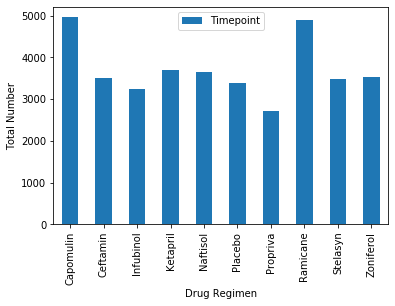

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
pd.pivot_table(new_df, index='Drug Regimen', values='Timepoint', aggfunc='sum').plot.bar().set_ylabel('Total Number')

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

new_df.Timepoint = plt.bar((labels), align='edge', width=0.8)
new_df = plt.bar(scores,10,labels=labels)

TypeError: bar() missing 1 required positional argument: 'height'

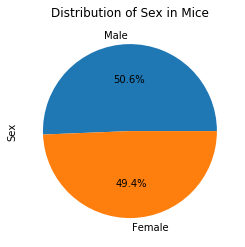

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
new_df.Sex.value_counts().plot(kind='pie', title='Distribution of Sex in Mice', autopct='%1.1f%%')

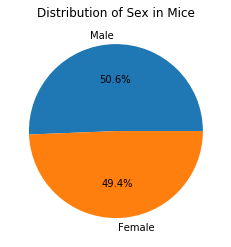

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
ax = plt.subplot()
ax.pie(new_df.Sex.value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%')
ax.set_title('Distribution of Sex in Mice')
plt.show()

Quartiles, Outliers & Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
print(regimen)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

result_df =  new_df.sort_values('Timepoint', ascending=False).drop_duplicates(['Mouse ID'])
# print(test_df)
filtered_df = result_df[result_df['Drug Regimen'].isin(drugs)]

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
filtered_df[['Mouse ID', 'Drug Regimen', 'Tumour Volume (mm3)', 'Timepoint']]

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


,Mouse ID,Drug Regimen,Tumour Volume (mm3),Timepoint
834,f345,Infubinol,60.918767,45
993,j296,Ceftamin,61.849023,45
360,g316,Capomulin,40.159220,45
124,y793,Capomulin,31.896238,45
350,v923,Capomulin,40.658124,45
...,...,...,...,...
940,h531,Ceftamin,47.784682,5
1743,x226,Ceftamin,45.000000,0
594,b447,Ceftamin,45.000000,0
1551,t573,Ceftamin,45.000000,0


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumour vol data (for plotting)
tumour_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

q3, q1 = np.percentile(filtered_df['Tumour Volume (mm3)'], [75,25])
iqr = q3 - q1
print(iqr)

outliers = q1 - 1.5*iqr
print(outliers)

filtered_df[filtered_df['Tumour Volume (mm3)'] < outliers]

    
    # Locate the rows which contain mice on each drug and get the tumour volumes

    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

22.74251795250001
3.0739668737499812


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites


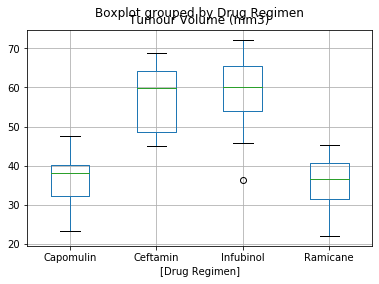

In [23]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
boxplot = filtered_df.boxplot(column=['Tumour Volume (mm3)'], by=['Drug Regimen'])

Line and Scatter Plots

AttributeError: 'Line2D' object has no property 'ylabel'

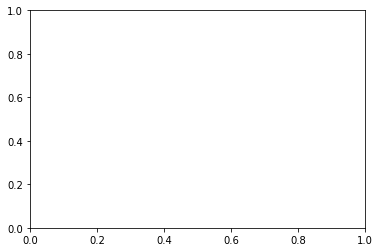

In [83]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
capomulin_df = filtered_df[filtered_df['Drug Regimen'].str.contains('Capomulin')]
ax = capomulin_df.plot(kind='line', y='Tumour Volume (mm3)', x='Timepoint', ylabel='Tumour Volume (mm3)', title='Tumour Volume vs Time')

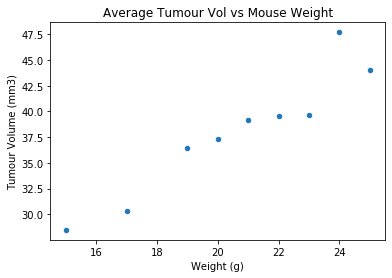

In [25]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
ave_by_weight = capomulin_df.groupby('Weight (g)').mean()
# print(ave_by_weight.reset_index())
ave_by_weight['Weight (g)'] = ave_by_weight.index
ave_by_weight.plot.scatter(y='Tumour Volume (mm3)', x='Weight (g)', title='Average Tumour Vol vs Mouse Weight')

Correlation and Regression

Correlation between Mouse Weight & Tumour Volume for Capumulin is :  0.95


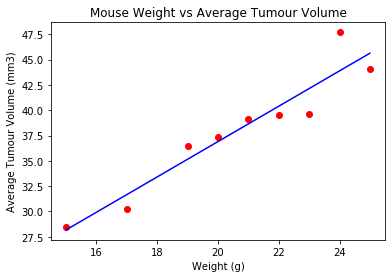

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
from sklearn.linear_model import LinearRegression
print("Correlation between Mouse Weight & Tumour Volume for Capumulin is : ", round(ave_by_weight['Weight (g)'].corr(ave_by_weight['Tumour Volume (mm3)']),2))

x=ave_by_weight['Weight (g)'].values.reshape(-1,1)
y=ave_by_weight['Tumour Volume (mm3)'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)
plt.scatter(x,y, color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title('Mouse Weight vs Average Tumour Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()